In [1]:
import pandas as pd
import numpy as np
import re
import time
pd.set_option('display.max_columns', 65)
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
params = {'legend.fontsize': 'medium',
              'axes.labelsize': 'medium',
              'axes.titlesize':'medium',
              'xtick.labelsize':'medium',
              'ytick.labelsize':'medium'}
plt.rcParams.update(params)


In [2]:
c17 = pd.read_csv("COMBO17.csv").iloc[:, 1:]
c17.head()

,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,e.UjMAG,BjMAG,e.BjMAG,VjMAG,e.VjMAG,usMAG,e.usMAG,gsMAG,e.gsMAG,rsMAG,e.rsMAG,UbMAG,e.UbMAG,BbMAG,e.BbMAG,VnMAG,e.VbMAG,S280MAG,e.S280MA,W420FE,e.W420FE,W462FE,e.W462FE,W485FD,e.W485FD,W518FE,e.W518FE,W571FS,e.W571FS,W604FE,e.W604FE,W646FD,e.W646FD,W696FE,e.W696FE,W753FE,e.W753FE,W815FS,e.W815FS,W856FD,e.W856FD,W914FD,e.W914FD,W914FE,e.W914FE,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
0,24.995,0.097,0.935,24.214,0.832,0.036,1.400,0.64,-17.67,0.14,-17.54,0.25,-17.76,0.25,-17.83,0.14,-17.60,0.25,-17.97,0.25,-17.76,0.14,-17.53,0.25,-17.76,0.25,-18.22,0.17,0.000660,3.85E-03,0.01270,0.00372,0.01890,0.00448,0.018200,0.00355,0.01470,0.00301,0.01660,0.00409,0.018800,0.00563,0.02460,0.00351,0.02450,0.00524,0.02160,0.00266,0.02440,0.00546,0.0377,0.00610,0.01170,0.0101,0.01870,0.00239,0.01630,0.00129,0.017300,0.00141,0.01650,0.000434,0.02470,0.00483
1,25.013,0.181,-0.135,25.303,0.927,0.122,0.864,0.41,-18.28,0.22,17.86,0.55,-18.20,0.55,-18.42,0.22,-17.96,0.55,-18.43,0.55,-18.36,0.22,-17.85,0.55,-18.19,0.55,-17.97,0.54,0.000324,3.19E-03,0.00514,0.00323,0.00273,0.00485,0.000785,0.00485,0.00991,0.00284,0.00905,0.00445,0.002980,0.00892,0.00983,0.00343,0.01420,0.00527,0.01470,0.00308,0.01140,0.00627,0.0103,0.00646,0.02630,0.0148,0.00706,0.00238,0.00420,0.00115,0.003930,0.00182,0.00723,0.000500,0.00973,0.00460
2,24.246,0.054,0.821,23.511,1.202,0.037,1.217,0.92,-19.75,0.14,-19.91,0.14,-20.41,0.14,-19.87,0.14,-20.05,0.14,-20.71,0.14,-19.82,0.14,-19.89,0.14,-20.40,0.14,-19.77,0.12,0.013000,4.11E-03,0.01970,0.00432,0.02550,0.00428,0.015900,0.00464,0.02290,0.00455,0.02340,0.00374,0.023100,0.00667,0.02720,0.00405,0.03540,0.00456,0.04530,0.00360,0.07810,0.00658,0.0711,0.00613,0.06410,0.0127,0.01260,0.00184,0.01830,0.00115,0.018800,0.00167,0.02880,0.000655,0.05700,0.00465
3,25.203,0.128,0.639,24.948,0.912,0.177,0.776,0.39,-17.83,0.17,-17.39,0.31,-17.67,0.31,-17.98,0.17,-17.47,0.31,-17.89,0.31,-17.92,0.17,-17.38,0.31,-17.67,0.31,-18.12,0.28,0.011900,2.70E-03,0.01590,0.00314,0.00156,0.00493,0.002610,0.00476,0.00176,0.00310,0.00916,0.00332,0.006330,0.00596,0.01230,0.00248,0.00225,0.00692,0.01690,0.00276,0.00875,0.00672,0.0070,0.00557,0.00587,0.0114,0.01410,0.00186,0.01180,0.00110,0.009670,0.00204,0.01050,0.000416,0.01340,0.00330
4,25.504,0.112,-1.588,24.934,0.848,0.067,1.330,1.45,-17.69,0.42,-18.40,0.83,-19.37,0.83,-17.81,0.42,-18.69,0.83,-19.88,0.83,-17.76,0.42,-18.35,0.83,-19.37,0.83,-13.93,45.11,0.001350,3.71E-03,0.00509,0.00268,0.00185,0.00401,0.009960,0.00432,0.00344,0.00448,0.00632,0.00366,-0.000184,0.01240,0.00554,0.00293,0.01620,0.00497,0.00676,0.00314,0.01020,0.00610,0.0133,0.00682,0.01990,0.0103,0.00514,0.00170,0.00102,0.00127,0.000039,0.00160,0.00139,0.000499,0.00590,0.00444


In [3]:
c17 = c17.drop(columns=["e.Mcz", "MCzml", "chi2red"])
target = ["Mcz"]
features = [col for col in c17.columns if col not in target]
c17 = c17[target + features]
c17.head()

,Mcz,Rmag,e.Rmag,ApDRmag,mumax,UjMAG,e.UjMAG,BjMAG,e.BjMAG,VjMAG,e.VjMAG,usMAG,e.usMAG,gsMAG,e.gsMAG,rsMAG,e.rsMAG,UbMAG,e.UbMAG,BbMAG,e.BbMAG,VnMAG,e.VbMAG,S280MAG,e.S280MA,W420FE,e.W420FE,W462FE,e.W462FE,W485FD,e.W485FD,W518FE,e.W518FE,W571FS,e.W571FS,W604FE,e.W604FE,W646FD,e.W646FD,W696FE,e.W696FE,W753FE,e.W753FE,W815FS,e.W815FS,W856FD,e.W856FD,W914FD,e.W914FD,W914FE,e.W914FE,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
0,0.832,24.995,0.097,0.935,24.214,-17.67,0.14,-17.54,0.25,-17.76,0.25,-17.83,0.14,-17.60,0.25,-17.97,0.25,-17.76,0.14,-17.53,0.25,-17.76,0.25,-18.22,0.17,0.000660,3.85E-03,0.01270,0.00372,0.01890,0.00448,0.018200,0.00355,0.01470,0.00301,0.01660,0.00409,0.018800,0.00563,0.02460,0.00351,0.02450,0.00524,0.02160,0.00266,0.02440,0.00546,0.0377,0.00610,0.01170,0.0101,0.01870,0.00239,0.01630,0.00129,0.017300,0.00141,0.01650,0.000434,0.02470,0.00483
1,0.927,25.013,0.181,-0.135,25.303,-18.28,0.22,17.86,0.55,-18.20,0.55,-18.42,0.22,-17.96,0.55,-18.43,0.55,-18.36,0.22,-17.85,0.55,-18.19,0.55,-17.97,0.54,0.000324,3.19E-03,0.00514,0.00323,0.00273,0.00485,0.000785,0.00485,0.00991,0.00284,0.00905,0.00445,0.002980,0.00892,0.00983,0.00343,0.01420,0.00527,0.01470,0.00308,0.01140,0.00627,0.0103,0.00646,0.02630,0.0148,0.00706,0.00238,0.00420,0.00115,0.003930,0.00182,0.00723,0.000500,0.00973,0.00460
2,1.202,24.246,0.054,0.821,23.511,-19.75,0.14,-19.91,0.14,-20.41,0.14,-19.87,0.14,-20.05,0.14,-20.71,0.14,-19.82,0.14,-19.89,0.14,-20.40,0.14,-19.77,0.12,0.013000,4.11E-03,0.01970,0.00432,0.02550,0.00428,0.015900,0.00464,0.02290,0.00455,0.02340,0.00374,0.023100,0.00667,0.02720,0.00405,0.03540,0.00456,0.04530,0.00360,0.07810,0.00658,0.0711,0.00613,0.06410,0.0127,0.01260,0.00184,0.01830,0.00115,0.018800,0.00167,0.02880,0.000655,0.05700,0.00465
3,0.912,25.203,0.128,0.639,24.948,-17.83,0.17,-17.39,0.31,-17.67,0.31,-17.98,0.17,-17.47,0.31,-17.89,0.31,-17.92,0.17,-17.38,0.31,-17.67,0.31,-18.12,0.28,0.011900,2.70E-03,0.01590,0.00314,0.00156,0.00493,0.002610,0.00476,0.00176,0.00310,0.00916,0.00332,0.006330,0.00596,0.01230,0.00248,0.00225,0.00692,0.01690,0.00276,0.00875,0.00672,0.0070,0.00557,0.00587,0.0114,0.01410,0.00186,0.01180,0.00110,0.009670,0.00204,0.01050,0.000416,0.01340,0.00330
4,0.848,25.504,0.112,-1.588,24.934,-17.69,0.42,-18.40,0.83,-19.37,0.83,-17.81,0.42,-18.69,0.83,-19.88,0.83,-17.76,0.42,-18.35,0.83,-19.37,0.83,-13.93,45.11,0.001350,3.71E-03,0.00509,0.00268,0.00185,0.00401,0.009960,0.00432,0.00344,0.00448,0.00632,0.00366,-0.000184,0.01240,0.00554,0.00293,0.01620,0.00497,0.00676,0.00314,0.01020,0.00610,0.0133,0.00682,0.01990,0.0103,0.00514,0.00170,0.00102,0.00127,0.000039,0.00160,0.00139,0.000499,0.00590,0.00444


In [4]:
c17.describe()

,Mcz,Rmag,e.Rmag,ApDRmag,mumax,UjMAG,e.UjMAG,BjMAG,e.BjMAG,VjMAG,e.VjMAG,usMAG,e.usMAG,gsMAG,e.gsMAG,rsMAG,e.rsMAG,UbMAG,e.UbMAG,BbMAG,e.BbMAG,VnMAG,e.VbMAG,S280MAG,e.S280MA,W420FE,W462FE,e.W462FE,W485FD,e.W485FD,W518FE,e.W518FE,W571FS,e.W571FS,W604FE,e.W604FE,W646FD,e.W646FD,W696FE,e.W696FE,W753FE,e.W753FE,W815FS,e.W815FS,W856FD,e.W856FD,W914FD,e.W914FD,W914FE,e.W914FE,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
count,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3461.000000,3461.000000,3438.000000,3438.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000
mean,0.728503,23.939266,0.106156,-0.190947,24.181846,-17.866005,0.182715,-17.749131,0.355820,-18.113235,0.384229,-18.016360,0.182926,-17.849081,0.380731,-18.384440,0.386150,-17.952750,0.182649,-17.740329,0.355858,-18.110361,0.384178,-18.011504,0.380128,-0.131550,0.025717,0.003215,0.023580,0.004632,0.029064,0.004198,0.034236,0.003584,0.037303,0.003565,0.038865,0.007939,0.043032,0.003170,0.047457,0.005099,0.049027,0.003146,0.052775,0.005902,0.052870,0.006535,0.058373,0.011172,0.015965,0.002003,0.021882,0.001174,0.029518,0.001682,0.039055,0.000479,0.048502,0.004043
std,0.319010,1.435899,0.083147,0.452994,1.017225,1.965501,0.168510,2.121378,1.234215,2.091646,1.285113,1.960905,0.168432,2.051961,1.285530,2.103292,1.284832,1.963792,0.168407,2.030769,1.234216,2.090500,1.285295,1.947664,2.036212,0.902021,0.073021,0.000839,0.077914,0.001287,0.108885,0.001131,0.134319,0.000834,0.153358,0.001058,0.153846,0.002436,0.172590,0.000771,0.183459,0.001144,0.182714,0.000659,0.193604,0.001334,0.202539,0.001415,0.204428,0.002559,0.025359,0.000335,0.064187,0.000343,0.119034,0.000631,0.164048,0.000199,0.187690,0.001486
min,0.007000,16.572000,0.001000,-4.700000,18.112000,-23.210000,0.100000,-23.150000,0.100000,-23.620000,0.100000,-23.330000,0.100000,-23.280000,0.100000,-23.940000,0.100000,-23.280000,0.100000,-23.130000,0.100000,-23.620000,0.100000,-23.590000,0.100000,-9.990000,-0.023800,0.002380,-0.012300,0.002970,-0.006250,0.002910,-0.006320,0.002510,-0.005810,0.002450,-0.022100,0.005120,-0.004560,0.002330,-0.006390,0.003720,-0.001770,0.002380,-0.014700,0.004240,-0.016300,0.005010,-0.021300,0.008050,-0.002430,0.001510,-0.001040,0.000843,-0.001830,0.001180,0.000912,0.000368,0.000056,0.003040
25%,0.519000,23.099000,0.039000,-0.425000,23.624250,-19.070000,0.110000,-19.010000,0.120000,-19.420000,0.130000,-19.230000,0.110000,-19.110000,0.120000,-19.690000,0.130000,-19.160000,0.110000,-18.990000,0.120000,-19.410000,0.130000,-19.230000,0.130000,0.006010,0.007752,0.002740,0.005870,0.003730,0.007430,0.003510,0.008315,0.003070,0.008290,0.002982,0.008892,0.006350,0.009390,0.002740,0.012100,0.004400,0.011800,0.002770,0.014000,0.005110,0.012400,0.005750,0.017000,0.009500,0.006120,0.001770,0.005580,0.001020,0.005922,0.001420,0.006860,0.000427,0.011000,0.003450
50%,0.810000,24.073500,0.080000,-0.141000,24.387500,-18.210000,0.150000,-18.130000,0.180000,-18.460000,0.220000,-18.360000,0.150000,-18.220000,0.210000,-18.710000,0.220000,-18.300000,0.150000,-18.110000,0.180000,-18.460000,0.220000,-18.365000,0.210000,0.011100,0.013500,0.003020,0.011400,0.004310,0.013100,0.003930,0.014350,0.003410,0.015000,0.003320,0.017750,0.007390,0.016500,0.003010,0.019800,0.004830,0.019200,0.003000,0.024000,0.005660,0.022500,0.006230,0.029100,0.010600,0.010200,0.001930,0.010300,0.001110,0.011600,0.001570,0.014000,0.000451,0.019100,0.003780
75%,0.981750,25.02975

In [5]:
c17['e.W420FE'] = [float(re.sub(r" ", "", j)) for j in [re.sub(r"E", "e", i) for i in c17['e.W420FE']]]
c17 = c17.apply(lambda x: x.astype('float64'))
#c17[features] = (c17[features]-c17[features].mean())/c17[features].std()
c17[features] = (c17[features]-c17[features].min())/(c17[features].max()-c17[features].min())
c17.head()

,Mcz,Rmag,e.Rmag,ApDRmag,mumax,UjMAG,e.UjMAG,BjMAG,e.BjMAG,VjMAG,e.VjMAG,usMAG,e.usMAG,gsMAG,e.gsMAG,rsMAG,e.rsMAG,UbMAG,e.UbMAG,BbMAG,e.BbMAG,VnMAG,e.VbMAG,S280MAG,e.S280MA,W420FE,e.W420FE,W462FE,e.W462FE,W485FD,e.W485FD,W518FE,e.W518FE,W571FS,e.W571FS,W604FE,e.W604FE,W646FD,e.W646FD,W696FE,e.W696FE,W753FE,e.W753FE,W815FS,e.W815FS,W856FD,e.W856FD,W914FD,e.W914FD,W914FE,e.W914FE,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
0,0.832,0.807729,0.309677,0.914476,0.790312,0.362092,0.005057,0.136796,0.002885,0.371121,0.002885,0.360892,0.005057,0.364804,0.002885,0.375708,0.002885,0.361493,0.005057,0.359897,0.002885,0.371121,0.002885,0.355865,0.000702,0.922754,0.002849,0.019796,0.074362,0.016315,0.105373,0.008355,0.028082,0.005313,0.031075,0.005278,0.079805,0.009485,0.011977,0.005909,0.071213,0.006207,0.075697,0.004536,0.019830,0.007541,0.042420,0.009381,0.032940,0.005728,0.037443,0.051233,0.182952,0.011788,0.060024,0.006031,0.015625,0.003367,0.010214,0.004659,0.042157
1,0.927,0.809455,0.580645,0.740831,0.931356,0.322222,0.015171,1.000000,0.008654,0.343255,0.008654,0.322178,0.015171,0.341683,0.008654,0.346759,0.008654,0.322200,0.015171,0.339332,0.008654,0.343889,0.008654,0.372432,0.004412,0.922723,0.001282,0.015696,0.047170,0.007860,0.131193,0.002404,0.085125,0.004102,0.020510,0.003500,0.097324,0.005816,0.089244,0.002916,0.066385,0.004138,0.077191,0.003197,0.049575,0.005034,0.070584,0.004621,0.043820,0.008262,0.123288,0.023010,0.180873,0.003562,0.041225,0.001816,0.043478,0.001365,0.020427,0.001829,0.036740
2,1.202,0.735903,0.170968,0.895975,0.699262,0.226144,0.005057,0.079005,0.000769,0.203293,0.000769,0.227034,0.005057,0.207450,0.000769,0.203272,0.000769,0.226588,0.005057,0.208226,0.000769,0.203927,0.000769,0.253148,0.000201,0.923894,0.003466,0.023593,0.107658,0.019767,0.091417,0.007569,0.075910,0.007386,0.126787,0.006880,0.062774,0.010482,0.036402,0.006436,0.103802,0.008398,0.041833,0.009137,0.086402,0.017899,0.081363,0.015183,0.033847,0.014823,0.084932,0.036443,0.068607,0.013147,0.041225,0.006504,0.033288,0.006025,0.044413,0.010765,0.037918
3,0.912,0.827675,0.409677,0.866439,0.885378,0.351634,0.008850,0.140454,0.004038,0.376821,0.004038,0.351050,0.008850,0.373154,0.004038,0.380743,0.004038,0.351015,0.008850,0.369537,0.004038,0.376821,0.004038,0.362492,0.001805,0.923792,0.000119,0.021532,0.042175,0.007248,0.136776,0.003028,0.081176,0.002042,0.036669,0.003526,0.042336,0.006593,0.019728,0.003417,0.009053,0.001736,0.159363,0.003624,0.026912,0.004523,0.086231,0.004048,0.016924,0.004716,0.061187,0.040080,0.072765,0.008729,0.034511,0.003626,0.058424,0.002071,0.007428,0.002523,0.006123
4,0.848,0.856540,0.358065,0.505031,0.883564,0.360784,0.040455,0.115825,0.014038,0.269158,0.014038,0.362205,0.040455,0.294798,0.014038,0.255507,0.014038,0.361493,0.040455,0.307198,0.014038,0.269158,0.014038,0.640159,0.451364,0.922818,0.002516,0.015669,0.016648,0.007399,0.072575,0.005540,0.061869,0.002467,0.122436,0.002857,0.058881,0.005082,0.170972,0.002047,0.036210,0.004539,0.062251,0.001656,0.053824,0.004803,0.064673,0.005142,0.054699,0.007151,0.041096,0.018355,0.039501,0.001400,0.057339,0.000589,0.028533,0.000103,0.020272,0.001105,0.032972


In [6]:
c17 = c17.dropna()
c17.describe()

,Mcz,Rmag,e.Rmag,ApDRmag,mumax,UjMAG,e.UjMAG,BjMAG,e.BjMAG,VjMAG,e.VjMAG,usMAG,e.usMAG,gsMAG,e.gsMAG,rsMAG,e.rsMAG,UbMAG,e.UbMAG,BbMAG,e.BbMAG,VnMAG,e.VbMAG,S280MAG,e.S280MA,W420FE,e.W420FE,W462FE,e.W462FE,W485FD,e.W485FD,W518FE,e.W518FE,W571FS,e.W571FS,W604FE,e.W604FE,W646FD,e.W646FD,W696FE,e.W696FE,W753FE,e.W753FE,W815FS,e.W815FS,W856FD,e.W856FD,W914FD,e.W914FD,W914FE,e.W914FE,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
count,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000
mean,0.728060,0.705339,0.336413,0.731650,0.785250,0.348669,0.010308,0.131542,0.004826,0.348505,0.005367,0.348040,0.010338,0.348444,0.005300,0.349443,0.005404,0.348254,0.010308,0.345986,0.004826,0.348781,0.005367,0.369682,0.002809,0.910812,0.011751,0.026939,0.046365,0.018843,0.115985,0.012128,0.056523,0.010303,0.066779,0.010205,0.054270,0.014190,0.065973,0.009695,0.050701,0.010875,0.068744,0.009910,0.054270,0.013071,0.057726,0.012064,0.046062,0.013881,0.056969,0.044826,0.102523,0.015677,0.044535,0.009947,0.034085,0.008292,0.017130,0.009207,0.023644
std,0.319235,0.137296,0.266225,0.073329,0.131671,0.128397,0.021273,0.051721,0.023566,0.132446,0.024554,0.128600,0.021273,0.131784,0.024562,0.132322,0.024549,0.128541,0.021273,0.130498,0.023566,0.132465,0.024554,0.129070,0.020419,0.082764,0.069100,0.039728,0.046452,0.040873,0.089793,0.037332,0.049742,0.034063,0.051890,0.036240,0.051588,0.035796,0.056574,0.035092,0.046587,0.036988,0.057066,0.035584,0.046792,0.037465,0.046438,0.035303,0.042770,0.035601,0.046575,0.061641,0.069602,0.043771,0.046218,0.037651,0.042945,0.035557,0.030853,0.035599,0.035100
min,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000583,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.517500,0.625503,0.122581,0.693768,0.712861,0.269935,0.001264,0.100707,0.000385,0.265991,0.000577,0.269029,0.001264,0.267180,0.000385,0.267464,0.000577,0.269155,0.001264,0.265424,0.000385,0.265991,0.000577,0.288933,0.000301,0.923256,0.000973,0.017155,0.020533,0.009554,0.053036,0.004710,0.026327,0.003726,0.034804,0.003335,0.025912,0.007210,0.028887,0.002838,0.024744,0.003721,0.033865,0.002653,0.027620,0.005574,0.030250,0.005003,0.022363,0.006670,0.026484,0.020852,0.056133,0.004556,0.023768,0.002462,0.016304,0.001304,0.009130,0.002069,0.009656
50%,0.809000,0.717779,0.251613,0.739857,0.812006,0.326144,0.006321,0.122165,0.001538,0.326789,0.002308,0.325459,0.006321,0.324984,0.002115,0.328823,0.002308,0.325475,0.006321,0.321979,0.001538,0.326789,0.002308,0.346256,0.001103,0.923728,0.001709,0.020284,0.035516,0.012393,0.093510,0.006647,0.044756,0.005237,0.055935,0.004925,0.042336,0.009276,0.053311,0.004308,0.041038,0.005283,0.055279,0.004090,0.043909,0.007484,0.049374,0.006758,0.036869,0.008783,0.046575,0.030623,0.087318,0.007777,0.035853,0.004297,0.026495,0.002838,0.012844,0.003619,0.017428
75%,0.982000,0.809719,0.506452,0.777020,0.885119,0.384967,0.0151

In [7]:
n = c17.shape[0]
p = c17.shape[1] - 1
iterations = 100
k = 10
ld_sq=10**np.linspace(-2,2,100)*0.5

train_r2 = np.zeros(shape=(iterations, 4))
test_r2 = np.zeros(shape=(iterations, 4))
cv_error = np.zeros(shape=(iterations, 3))
cv_curve = np.zeros(shape=(3, iterations*k, len(ld_sq)))
ld_cv = np.zeros(shape=(iterations, 3))

train_resid = np.zeros(shape=(2750, 4))
test_resid = np.zeros(shape=(688, 4))

time_cv_fit = np.zeros(shape=(iterations, 4))
time_cv = np.zeros(shape=(iterations, 3))

#coef_m = np.zeros(shape=(3, iterations, p+1))


In [8]:
n

3438

In [9]:
p

60

In [8]:
def cv_optimize(X, y, k, algo, ld_sq):
    avg_err_arr = np.zeros(shape=(len(ld_sq),))
    err_split = np.zeros(shape=(k,len(ld_sq)))
    kf = KFold(n_splits=k, shuffle=True)
    
    for i, ld in enumerate(ld_sq):
        model = algo
        model.set_params(alpha = ld)
        
        err_arr = np.zeros(shape=(k,))

        for j, (train_index , test_index) in enumerate(kf.split(X)):
            X_train , X_test = X[train_index,:],X[test_index,:]
            y_train , y_test = y[train_index] , y[test_index]
            
            model.fit(X_train,y_train)
            pred_values = model.predict(X_test)
            err = ((y_test - pred_values)**2).sum()/len(y_test)
            #r2 = 1 - (((y_test - pred_values) ** 2).mean())/(((y_test - y_test.mean()) ** 2).mean())
            #r2_list.append(r2)
            #r2 = r2_score(y_test, pred_values)
            #r2_arr[j] = r2
            err_arr[j] = err
        avg_err = sum(err_arr)/k
        avg_err_arr[i] = avg_err
        err_split[:,i] = err_arr
    best_lamb = ld_sq[avg_err_arr.argmin(axis=0)]
    min_cv_err = min(avg_err_arr)#.argmin(axis=0)
    return (best_lamb, min_cv_err, err_split)


In [9]:
rdom = np.random.choice(np.arange(iterations))
r = np.arange(0,1010,10)

for (i,c) in zip(range(iterations), range(len(r))):
    print("Begin Iteration %d" %(i+1))
    dtrain=c17.sample(frac=0.8)#, random_state=i)
    dtest=c17.drop(dtrain.index)
    X_train=dtrain.iloc[:,1:].values; y_train=dtrain.iloc[:,0].values
    X_test=dtest.iloc[:,1:].values; y_test=dtest.iloc[:,0].values
    #ld_sq = ld_path(X_train, y_train)
    for j, mod in enumerate([Ridge(), Lasso(max_iter=5000), ElasticNet(max_iter=5000)]):
    ######### Ridge/Lasso/Elastic
        start_time = time.time()
        result = cv_optimize(X=X_train, y=y_train, k=10, algo=mod, ld_sq=ld_sq)
        time_cv_fit[i,j] = time.time() - start_time
        time_cv[i,j] = time_cv_fit[i,j]
        cv_error[i,j] = result[1]
        ld = result[0]
        ld_cv[i,j] = ld
        model = mod
        model.set_params(alpha=ld)
        start_time = time.time()
        model.fit(X_train, y_train)
        time_cv_fit[i,j] = time_cv_fit[i,j] + (time.time()-start_time)
        train_preds = model.predict(X_train)
        preds = model.predict(X_test)
        r2_train = 1 - (((y_train - train_preds) ** 2).mean())/(((y_train - y_train.mean()) ** 2).mean())
        r2_test = 1 - (((y_test - preds) ** 2).mean())/(((y_test - y_test.mean()) ** 2).mean())
        train_r2[i,j] = r2_train
        test_r2[i,j] = r2_test
        cv_curve[j, r[c]:r[c+1], :] = result[2]
        if (i==rdom):
            train_resid[:,j] = y_train - train_preds
            test_resid[:,j] = y_test - preds

    ########## Random Forest
    start_time = time.time()
    model = RandomForestRegressor(n_estimators=1000, max_depth=100, max_samples=0.8)#.set_params(rf_cv)
    model.fit(X_train, y_train)
    time_cv_fit[i,3] = time_cv_fit[i,3] + (time.time()-start_time)
    train_preds = model.predict(X_train)
    preds = model.predict(X_test)
    r2_train = 1 - (((y_train - train_preds) ** 2).mean())/(((y_train - y_train.mean()) ** 2).mean())
    r2_test = 1 - (((y_test - preds) ** 2).mean())/(((y_test - y_test.mean()) ** 2).mean())
    train_r2[i,3] = r2_train
    test_r2[i,3] = r2_test
    if (i==rdom):
        train_resid[:,3] = y_train - train_preds
        test_resid[:,3] = y_test - preds
        

Begin Iteration 1
Begin Iteration 2
Begin Iteration 3
Begin Iteration 4
Begin Iteration 5
Begin Iteration 6
Begin Iteration 7
Begin Iteration 8
Begin Iteration 9
Begin Iteration 10
Begin Iteration 11
Begin Iteration 12
Begin Iteration 13
Begin Iteration 14
Begin Iteration 15
Begin Iteration 16
Begin Iteration 17
Begin Iteration 18
Begin Iteration 19
Begin Iteration 20
Begin Iteration 21
Begin Iteration 22
Begin Iteration 23
Begin Iteration 24
Begin Iteration 25
Begin Iteration 26
Begin Iteration 27
Begin Iteration 28
Begin Iteration 29
Begin Iteration 30
Begin Iteration 31
Begin Iteration 32
Begin Iteration 33
Begin Iteration 34
Begin Iteration 35
Begin Iteration 36
Begin Iteration 37
Begin Iteration 38
Begin Iteration 39
Begin Iteration 40
Begin Iteration 41
Begin Iteration 42
Begin Iteration 43
Begin Iteration 44
Begin Iteration 45
Begin Iteration 46
Begin Iteration 47
Begin Iteration 48
Begin Iteration 49
Begin Iteration 50
Begin Iteration 51
Begin Iteration 52
Begin Iteration 53
Be

In [35]:
#np.save("train_r2.npy", train_r2)
#np.save("test_r2.npy", test_r2)
#np.save("cv_error.npy", cv_error)
#np.save("cv_curve.npy", cv_curve)

#np.save("ld_cv.npy", ld_cv)

#np.save("train_resid.npy", train_resid)
#np.save("test_resid.npy", test_resid)

#np.save("time_cv_fit.npy", time_cv_fit)
#np.save("time_cv.npy", time_cv)

In [15]:
time_m = np.zeros(shape=(iterations, 4))
coef_bs_m = np.zeros(shape=(3, iterations, p+1))
ld_bs = np.zeros(shape=(iterations, 3))
rf_coef = np.zeros(shape=(iterations, p))

In [16]:
for i in range(iterations):
    print("Begin Iteration %d" %(i+1))
    ind = np.random.choice(np.arange(0, c17.shape[0]), replace=True, size=c17.shape[0])
    X_bs = c17.iloc[ind,1:].values
    y_bs = c17.iloc[ind,0].values
    kf = KFold(n_splits=k, shuffle=True)
    # Ridge/Lasso/Elastic
    for (j, algo) in enumerate([RidgeCV(alphas=ld_sq, cv=kf),
                                LassoCV(alphas=ld_sq, max_iter=5000, cv=kf),
                                ElasticNetCV(alphas=ld_sq, max_iter=5000, cv=kf)]):
        start_time = time.time()
        cv = algo
        cv.fit(X_bs, y_bs)
        time_m[i,j] = time.time() - start_time
        ld_bs[i,j] = cv.alpha_
        coef_bs_m[j,i,0] = cv.intercept_
        coef_bs_m[j,i,1:] = cv.coef_
    ##### Random Forest
    start_time = time.time()
    rf = RandomForestRegressor(n_estimators=1000, max_depth=100, max_samples=0.8)
    rf.fit(X_bs, y_bs)
    time_m[i,3] = time.time() - start_time
    rf_coef[i,:] = rf.feature_importances_
    

Begin Iteration 1
Begin Iteration 2
Begin Iteration 3
Begin Iteration 4
Begin Iteration 5
Begin Iteration 6
Begin Iteration 7
Begin Iteration 8
Begin Iteration 9
Begin Iteration 10
Begin Iteration 11
Begin Iteration 12
Begin Iteration 13
Begin Iteration 14
Begin Iteration 15
Begin Iteration 16
Begin Iteration 17
Begin Iteration 18
Begin Iteration 19
Begin Iteration 20
Begin Iteration 21
Begin Iteration 22
Begin Iteration 23
Begin Iteration 24
Begin Iteration 25
Begin Iteration 26
Begin Iteration 27
Begin Iteration 28
Begin Iteration 29
Begin Iteration 30
Begin Iteration 31
Begin Iteration 32
Begin Iteration 33
Begin Iteration 34
Begin Iteration 35
Begin Iteration 36
Begin Iteration 37
Begin Iteration 38
Begin Iteration 39
Begin Iteration 40
Begin Iteration 41
Begin Iteration 42
Begin Iteration 43
Begin Iteration 44
Begin Iteration 45
Begin Iteration 46
Begin Iteration 47
Begin Iteration 48
Begin Iteration 49
Begin Iteration 50
Begin Iteration 51
Begin Iteration 52
Begin Iteration 53
Be

In [38]:
#np.save("time_m.npy", time_m)
#np.save("coef_bs_m.npy", coef_bs_m)
#np.save("ld_bs.npy", ld_bs)
#np.save("rf_coef.npy", rf_coef)


In [43]:
train_r2 = pd.DataFrame(train_r2, columns=["ridge", "lasso", "elasticNet", "RF"])
test_r2 = pd.DataFrame(test_r2, columns=["ridge", "lasso", "elasticNet", "RF"])

In [45]:
train_r2 = pd.melt(train_r2, var_name="models", value_name='train_r2')
test_r2 = pd.melt(test_r2, var_name="models", value_name='test_r2')

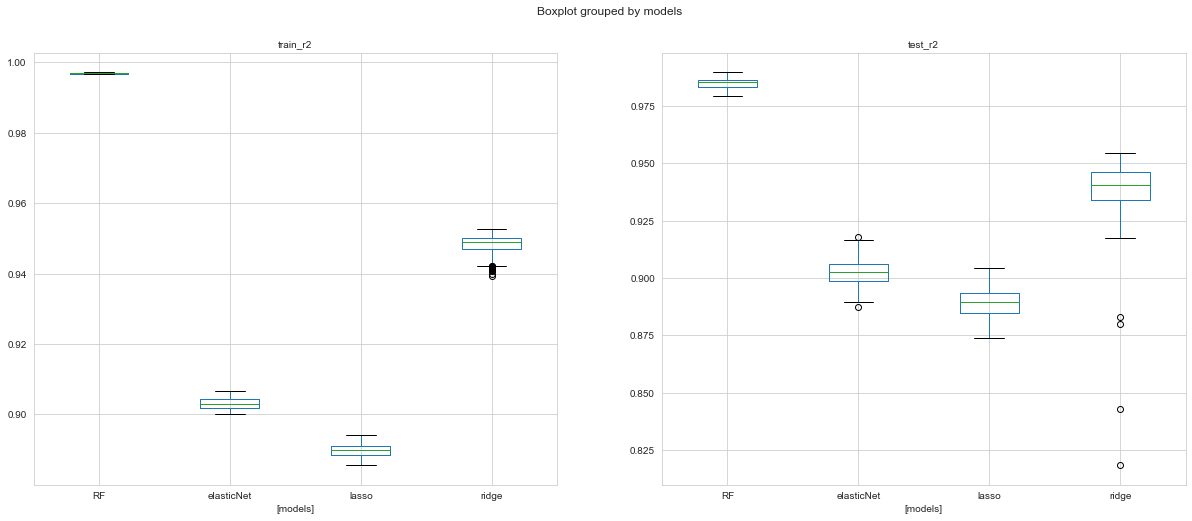

In [180]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
train_r2.boxplot(by="models", ax=ax1)
test_r2.boxplot(by="models", ax=ax2)

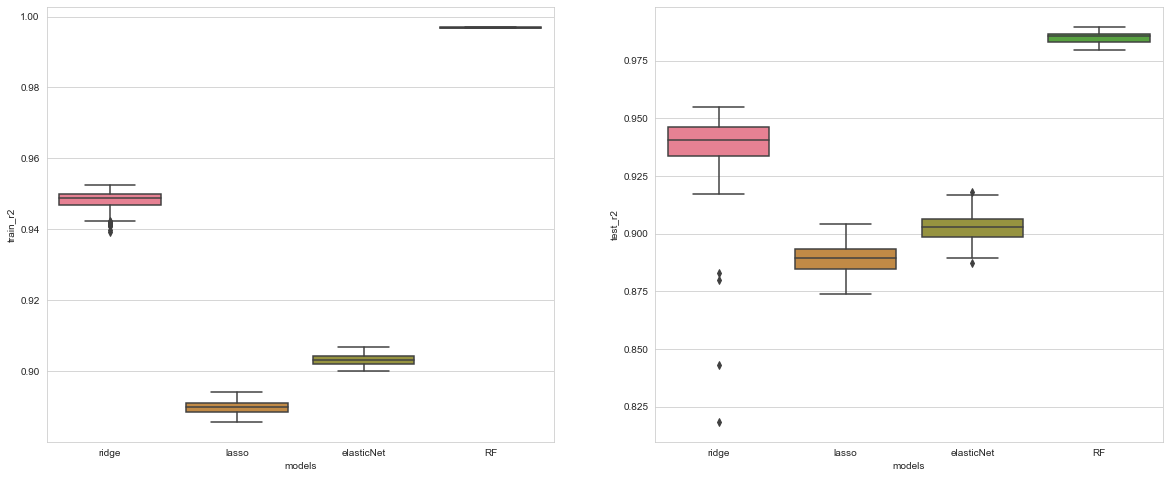

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

for ax, (c, df) in enumerate(zip(['train_r2', 'test_r2'], [train_r2, test_r2])):
    sns.boxplot(x='models',y=c, data=df, palette=sns.color_palette("husl",8+1),
                showfliers = True, ax=axes[ax])


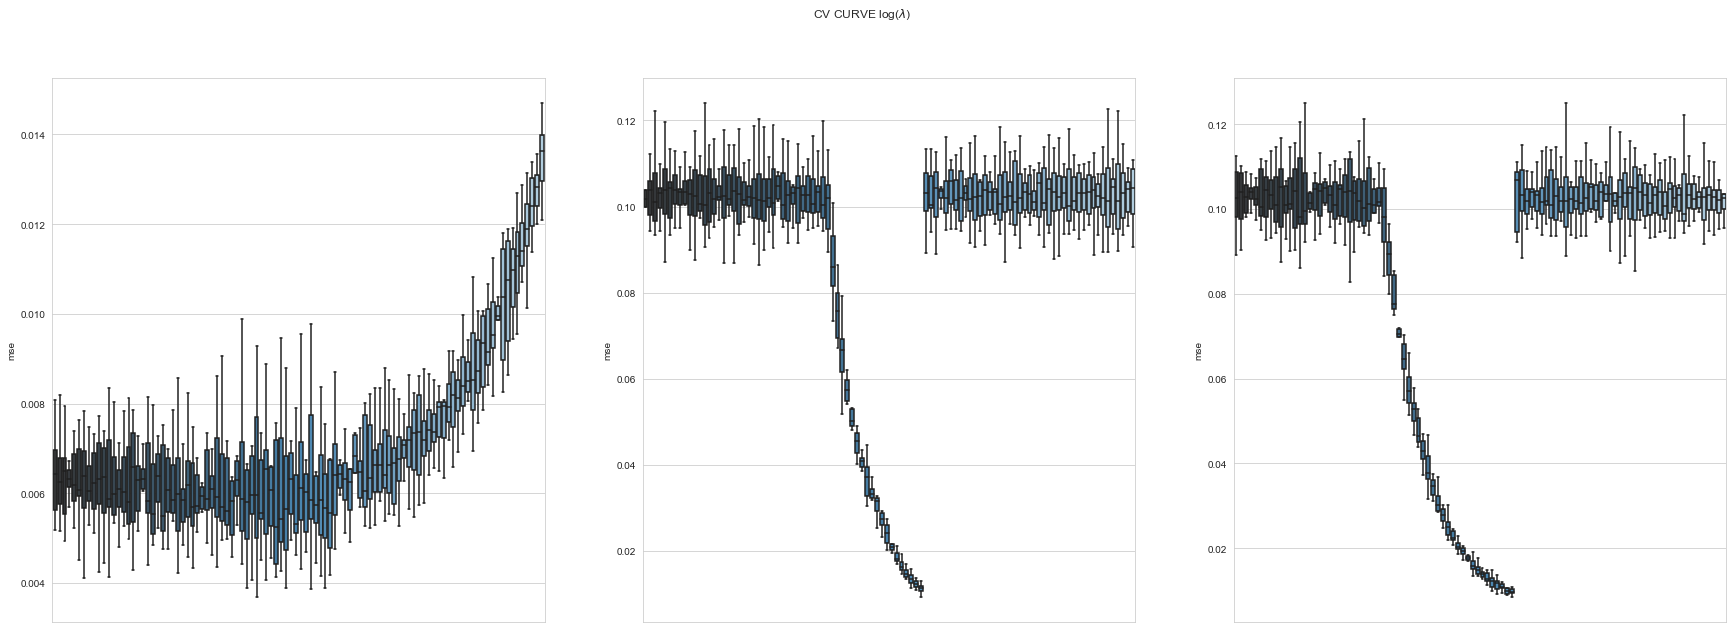

In [199]:
def cv_curve_plot(data):
    df1 = pd.DataFrame(data[0,0:10,:], columns=np.round(np.log(ld_sq),2))
    df1 = pd.melt(df1, var_name="log($\lambda$)", value_name='mse')
    df1['log($\lambda$)'] = df1['log($\lambda$)'].astype(str)
    
    df2 = pd.DataFrame(data[1,0:10,:], columns=np.round(np.log(ld_sq),2))
    df2 = pd.melt(df2, var_name="log($\lambda$)", value_name='mse')
    df2['log($\lambda$)'] = df2['log($\lambda$)'].astype(str)
    
    df3 = pd.DataFrame(data[2,0:10,:], columns=np.round(np.log(ld_sq),2))
    df3 = pd.melt(df3, var_name="log($\lambda$)", value_name='mse')
    df3['log($\lambda$)'] = df3['log($\lambda$)'].astype(str)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    plt.suptitle("CV CURVE log($\lambda$)")
    for ax, df in enumerate([df1, df2, df3]):
        sns.boxplot(x='log($\lambda$)',y='mse', data=df, palette="Blues_d",
                    showfliers = False, ax=axes[ax])
        axes[ax].set_xticklabels(axes[ax].get_xticklabels(),rotation=90);
        axes[ax].axes.get_xaxis().set_visible(False)
cv_curve_plot(cv_curve)


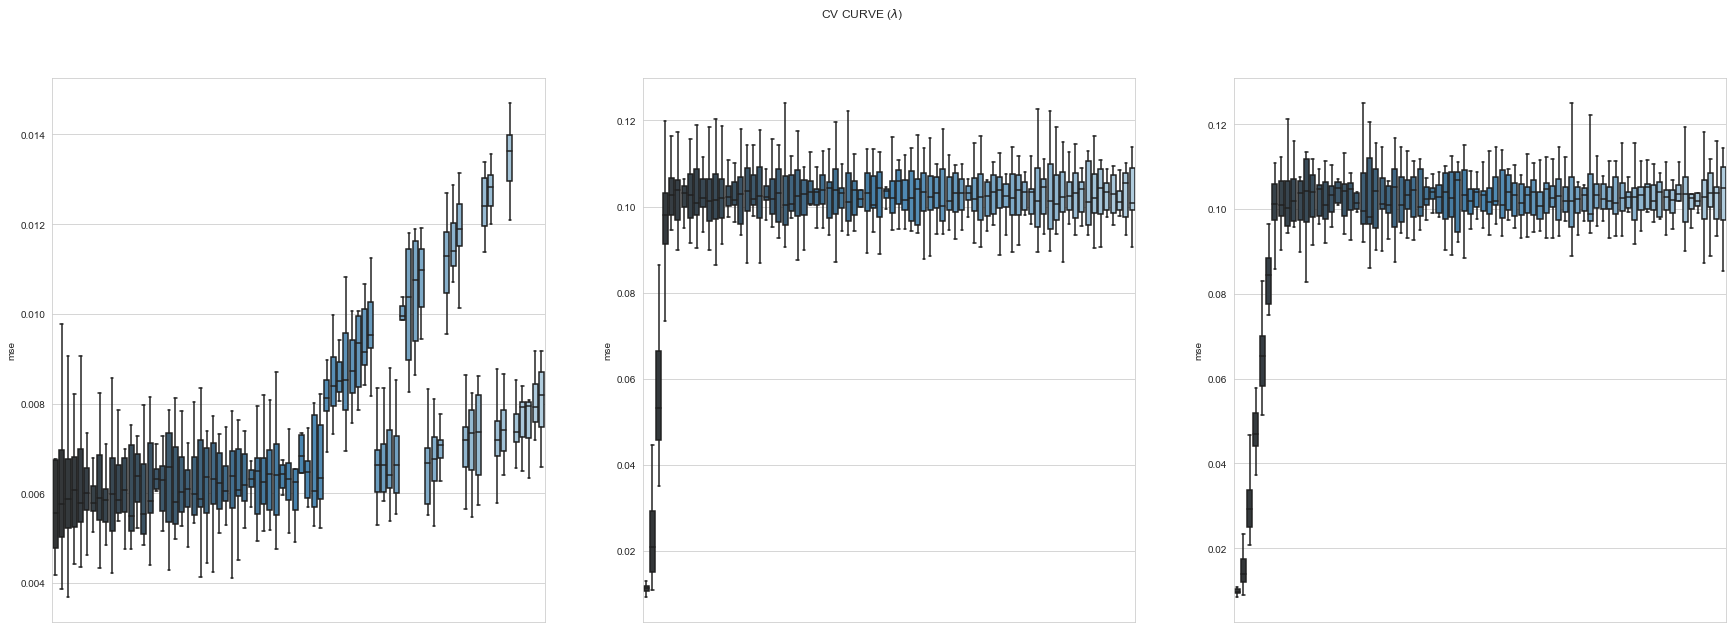

In [197]:
def cv_curve_plot(data):
    df1 = pd.DataFrame(data[0,0:10,:], columns=np.round(ld_sq,2))
    df1 = pd.melt(df1, var_name="log($\lambda$)", value_name='mse')
    df1['log($\lambda$)'] = df1['log($\lambda$)'].astype(str)
    
    df2 = pd.DataFrame(data[1,0:10,:], columns=np.round(ld_sq,2))
    df2 = pd.melt(df2, var_name="log($\lambda$)", value_name='mse')
    df2['log($\lambda$)'] = df2['log($\lambda$)'].astype(str)
    
    df3 = pd.DataFrame(data[2,0:10,:], columns=np.round(ld_sq,2))
    df3 = pd.melt(df3, var_name="log($\lambda$)", value_name='mse')
    df3['log($\lambda$)'] = df3['log($\lambda$)'].astype(str)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    plt.suptitle("CV CURVE ($\lambda$)")
    for ax, df in enumerate([df1, df2, df3]):
        sns.boxplot(x='log($\lambda$)',y='mse', data=df, palette="Blues_d",
                    showfliers = False, ax=axes[ax])
        axes[ax].set_xticklabels(axes[ax].get_xticklabels(),rotation=90);
        axes[ax].axes.get_xaxis().set_visible(False)
cv_curve_plot(cv_curve)

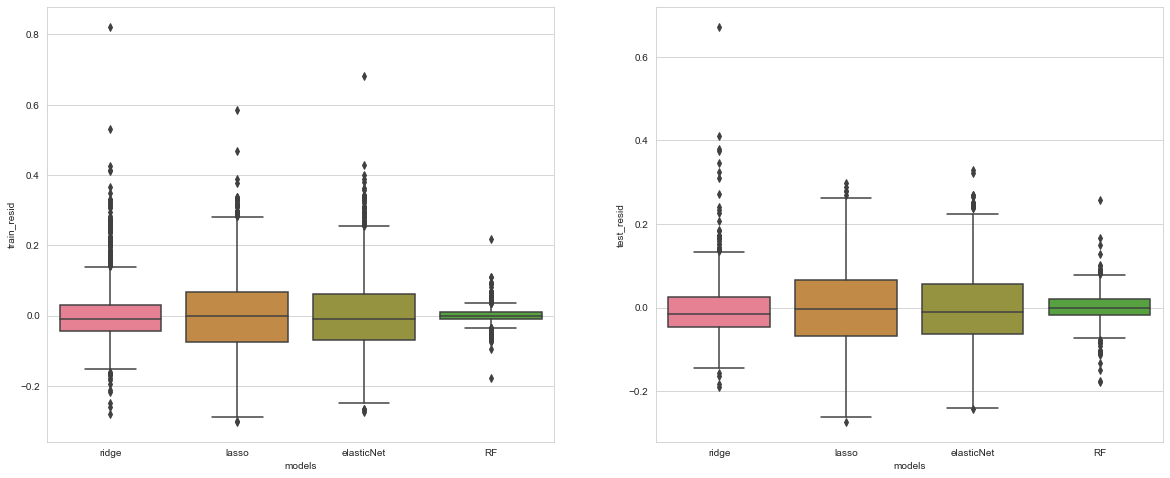

In [156]:
train_resid = pd.melt(pd.DataFrame(train_resid, columns=["ridge", "lasso", "elasticNet", "RF"]), var_name="models", value_name='train_resid')
test_resid = pd.melt(pd.DataFrame(test_resid, columns=["ridge", "lasso", "elasticNet", "RF"]), var_name="models", value_name='test_resid')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

for ax, (c, df) in enumerate(zip(['train_resid', 'test_resid'], [train_resid, test_resid])):
    sns.boxplot(x='models',y=c, data=df, palette=sns.color_palette("husl",8+1),
                showfliers = True, ax=axes[ax])


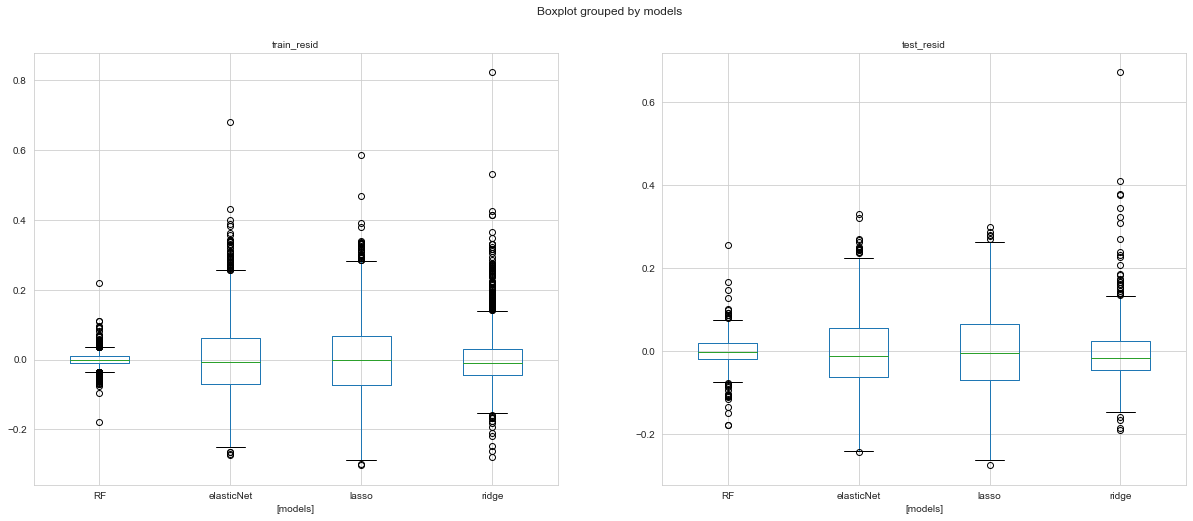

In [181]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
train_resid.boxplot(by="models", ax=ax1)
test_resid.boxplot(by="models", ax=ax2)

In [17]:
#coef_bs_m = np.load("coef_bs_m.npy")
rf_coef = np.load("rf_coef.npy")

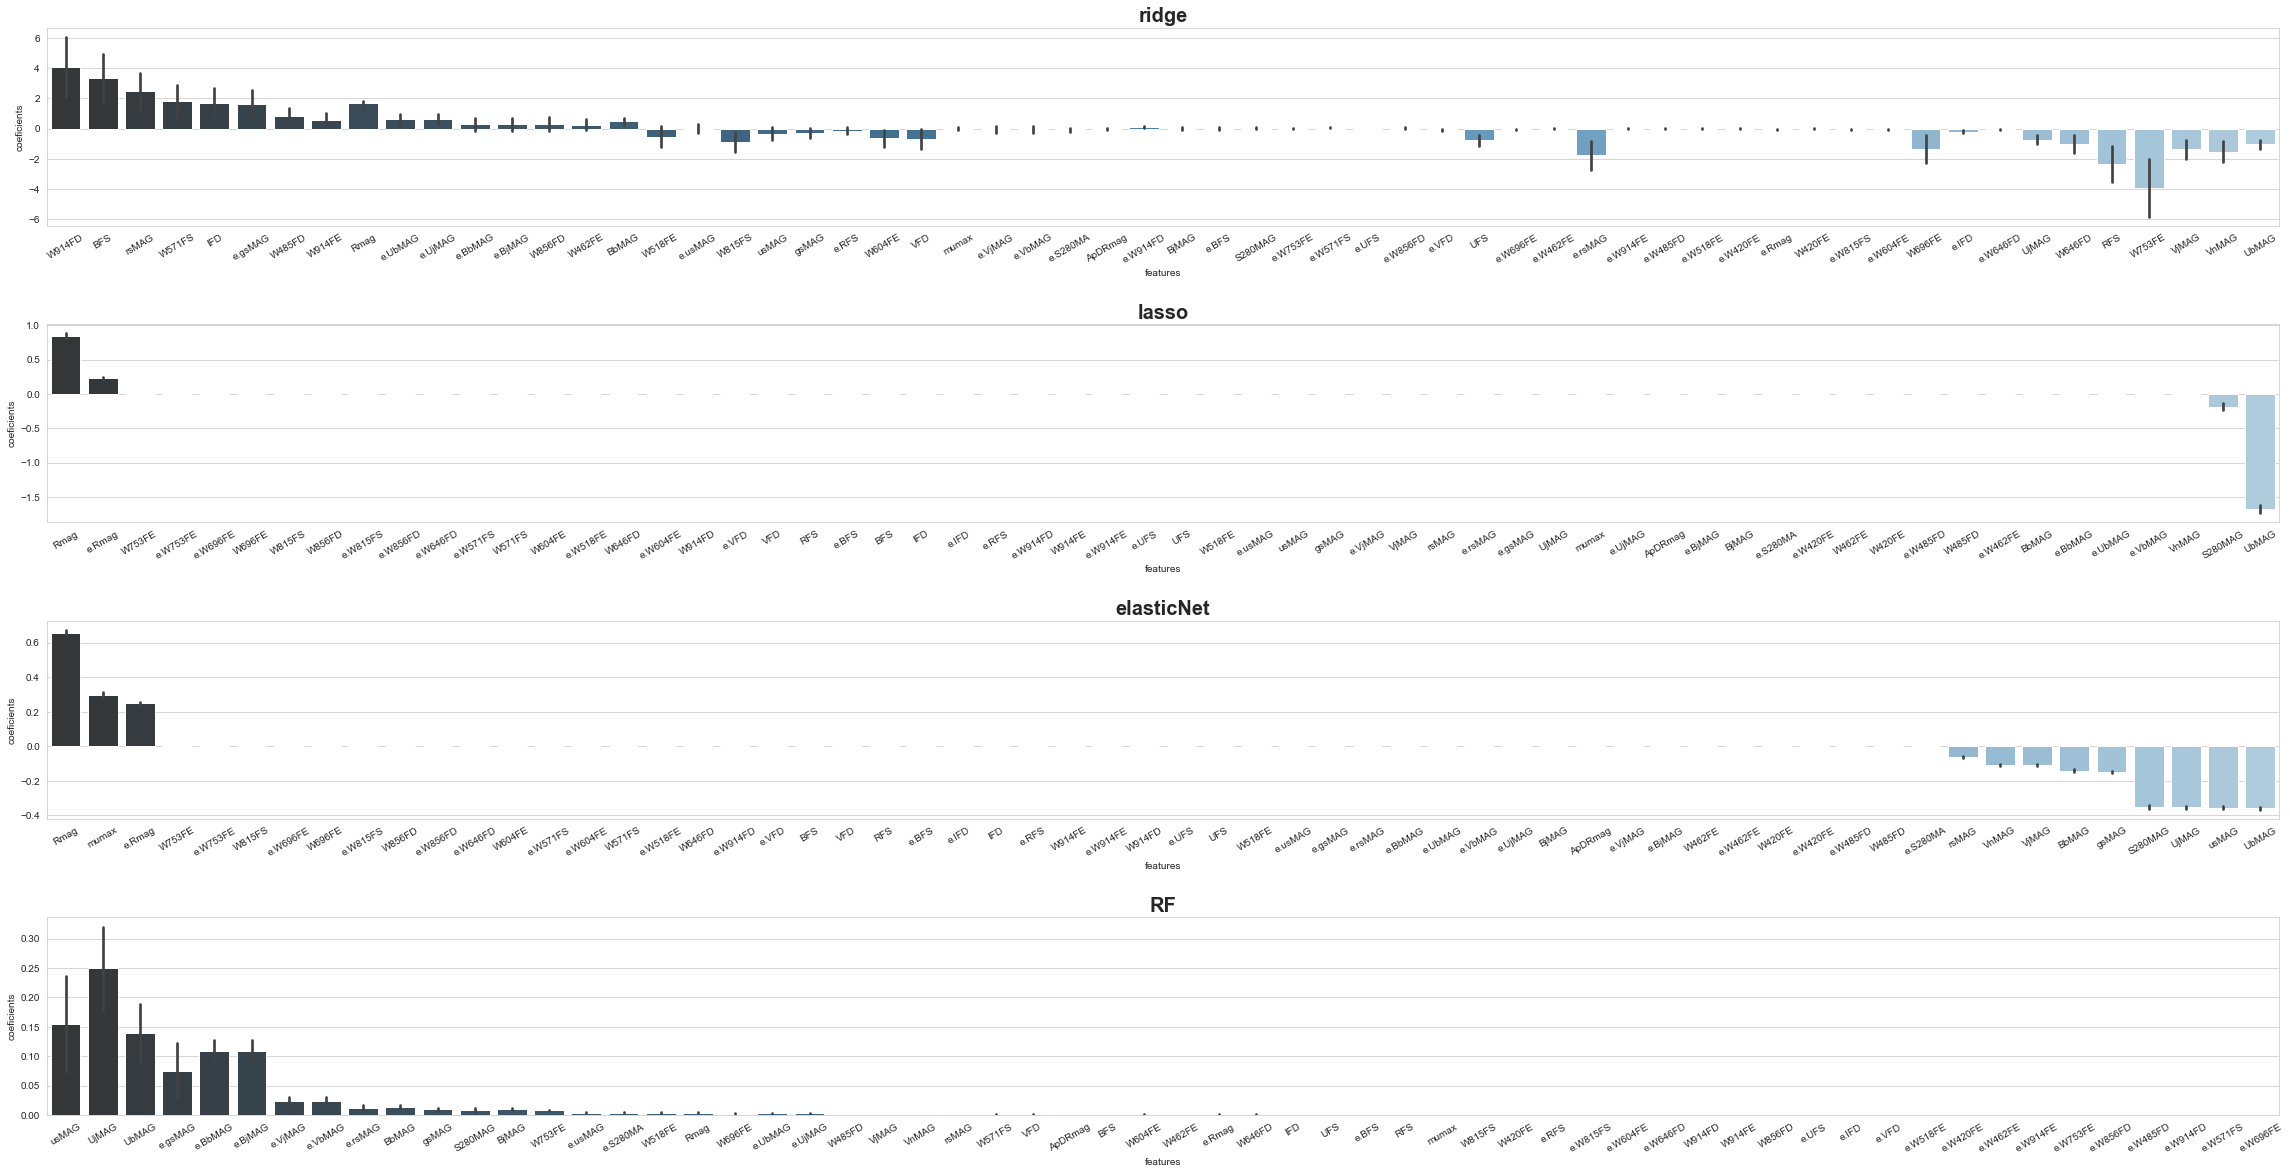

In [193]:
def coef_plot():

    df1=pd.melt(pd.DataFrame(coef_bs_m[0,:,1:], columns=c17.columns[1:]),  var_name="features", value_name='coeficients')
    df1=df1.sort_values(['coeficients'], ascending=False).reset_index(drop=True)
    
    df2=pd.melt(pd.DataFrame(coef_bs_m[1,:,1:], columns=c17.columns[1:]),  var_name="features", value_name='coeficients')
    df2=df2.sort_values(['coeficients'], ascending=False).reset_index(drop=True)
    
    df3=pd.melt(pd.DataFrame(coef_bs_m[2,:,1:], columns=c17.columns[1:]),  var_name="features", value_name='coeficients')
    df3=df3.sort_values(['coeficients'], ascending=False).reset_index(drop=True)
    
    df4=pd.melt(pd.DataFrame(rf_coef, columns=c17.columns[1:]),  var_name="features", value_name='coeficients')
    df4=df4.sort_values(['coeficients'], ascending=False).reset_index(drop=True)
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(40, 20))
    fig.subplots_adjust(hspace=.5)
    for ax, (df, n) in enumerate(zip([df1, df2, df3, df4], ["ridge", "lasso", "elasticNet", "RF"])):
        sns.barplot(x="features", y="coeficients", data=df, ci="sd", palette="Blues_d",
                    ax=axes[ax])
        axes[ax].set_xticklabels([])
        axes[ax].set_title(n, fontweight ="bold", fontsize = 20)
        axes[ax].set_xticklabels(axes[ax].get_xticklabels(),rotation=30);
    plt.savefig('coef.png')
coef_plot()


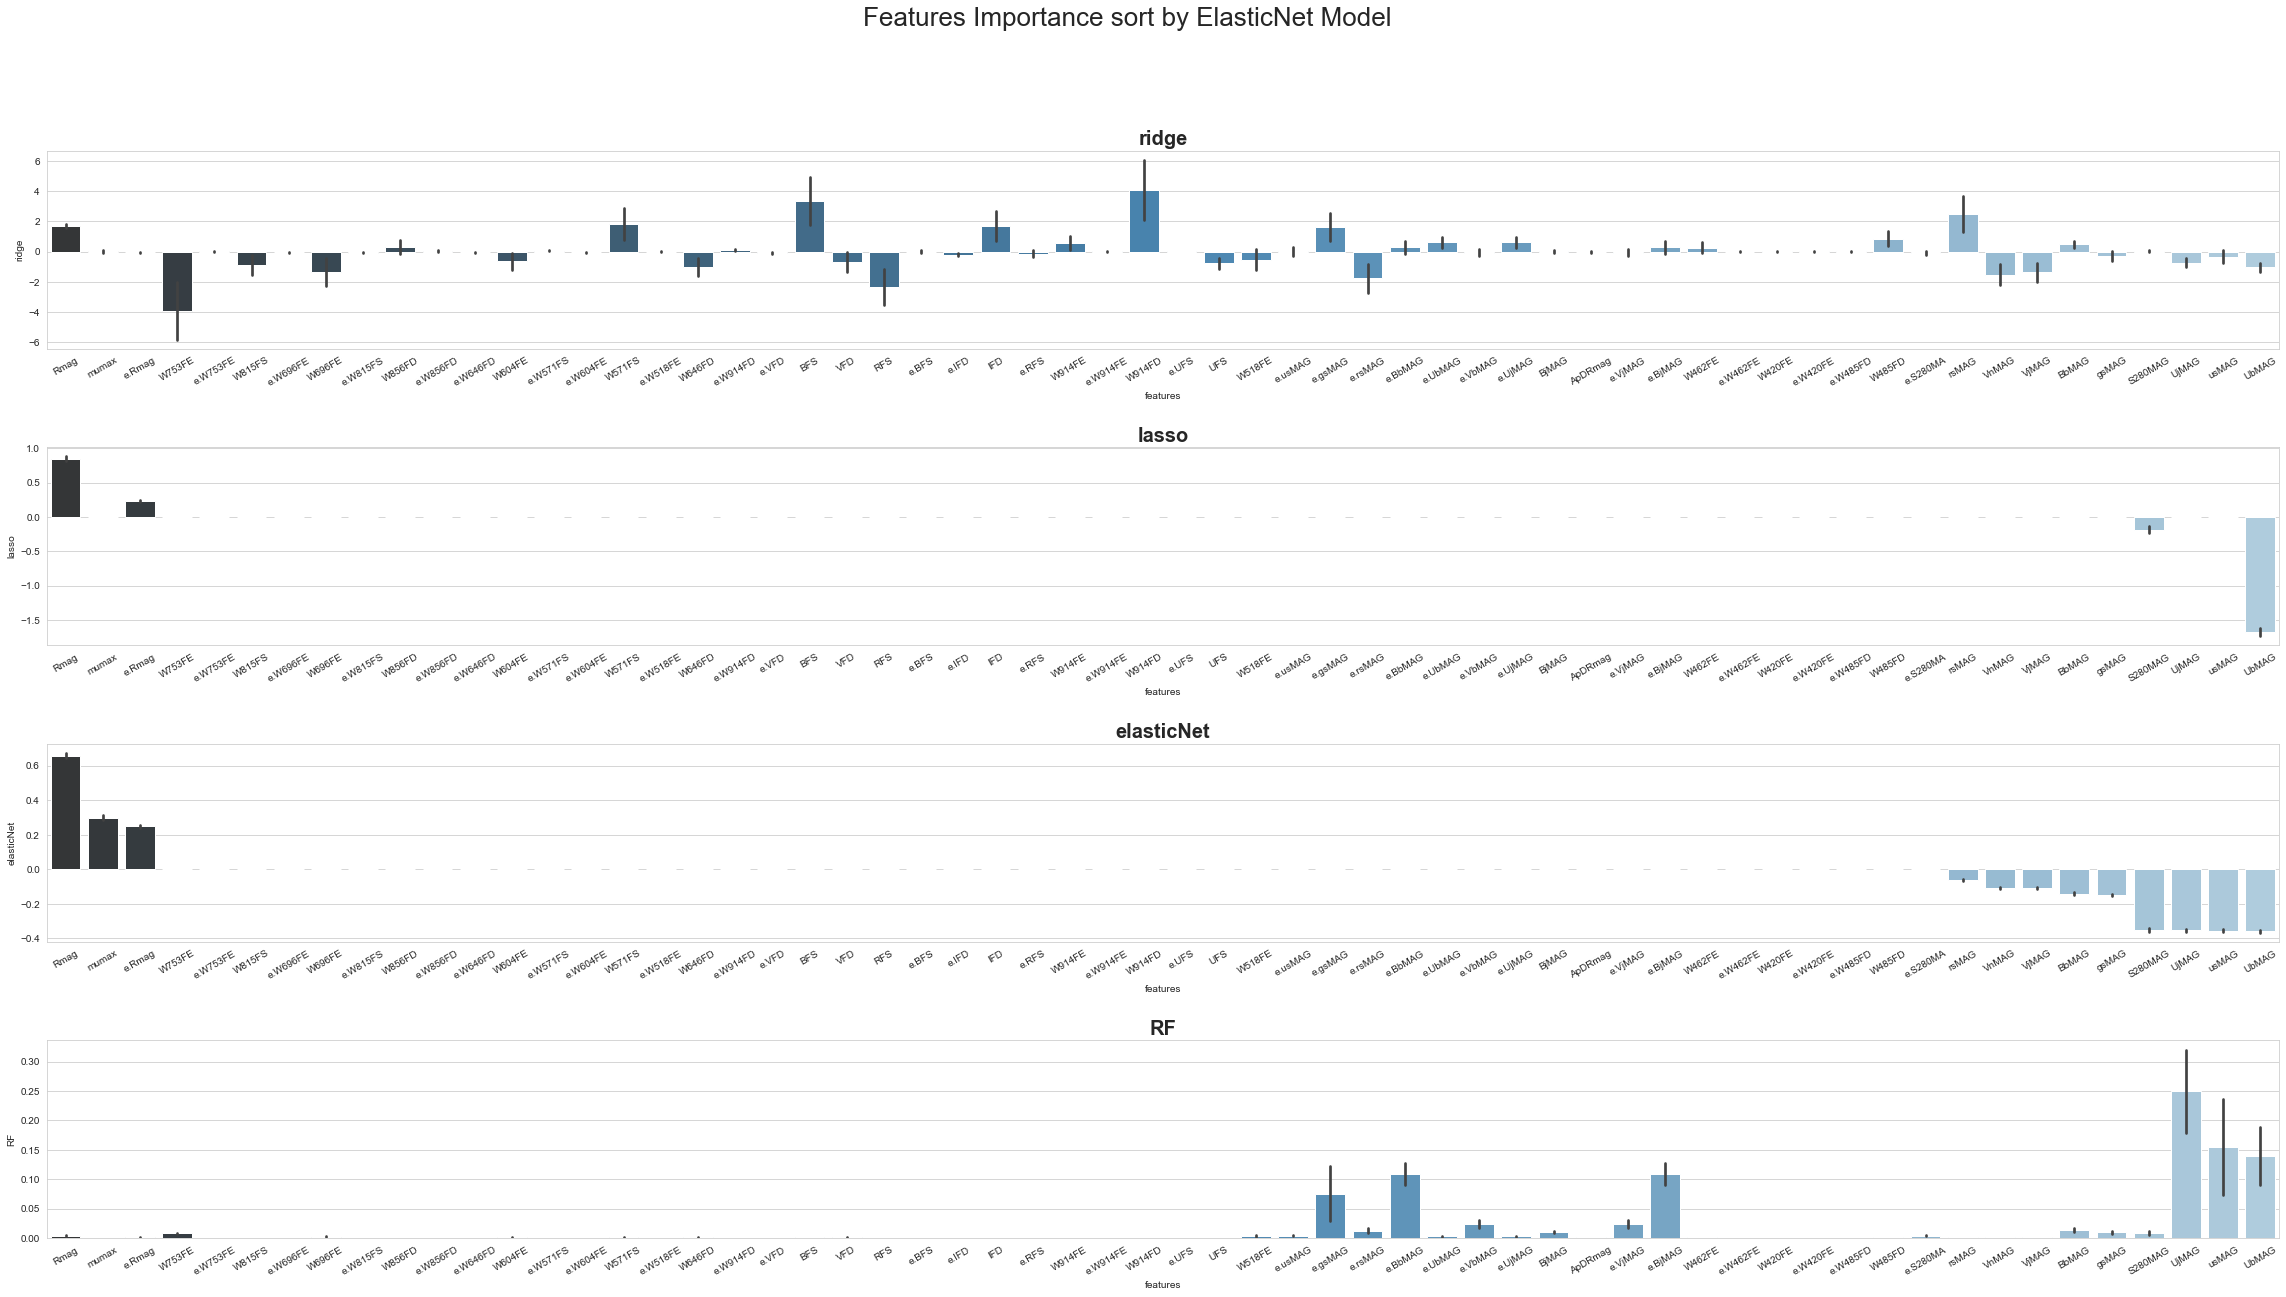

In [43]:
def coef_plot():

    df1 = pd.melt(pd.DataFrame(coef_bs_m[0,:,1:], columns=c17.columns[1:]),  var_name="features", value_name='ridge')
    df2 = pd.melt(pd.DataFrame(coef_bs_m[1,:,1:], columns=c17.columns[1:]),  var_name="features", value_name='lasso')
    df3 = pd.melt(pd.DataFrame(coef_bs_m[2,:,1:], columns=c17.columns[1:]),  var_name="features", value_name='elasticNet')
    df4 = pd.melt(pd.DataFrame(rf_coef, columns=c17.columns[1:]),  var_name="features", value_name='RF')
    df = pd.concat([df1, df2[["lasso"]], df3[["elasticNet"]], df4[["RF"]]], axis=1)
    df = df.sort_values(['elasticNet'], ascending=False).reset_index(drop=True)
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(40, 20))
    fig.subplots_adjust(hspace=.5)
    fig.suptitle('Features Importance sort by ElasticNet Model', fontsize=26)
    for ax, c in enumerate(df.columns[1:]):
        sns.barplot(x="features", y=c, data=df, ci="sd", palette="Blues_d",
                    ax=axes[ax])
        axes[ax].set_xticklabels([])
        axes[ax].set_title(c, fontweight ="bold", fontsize = 20)
        axes[ax].set_xticklabels(axes[ax].get_xticklabels(),rotation=30);
    plt.savefig('coef.png')
        
coef_plot()